In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# stickleback

A Python package for finding *point behaviors* in longitudinal sensor data.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from stickleback.stickleback import Stickleback

s = Stickleback(win_size=1, tol=pd.Timedelta("1 days"))

plt.rcParams['figure.figsize'] = [12, 8]

TypeError: __init__() missing 1 required positional argument: 'local_clf'

## Usage

Read the example data (longitudinal sensor data and events) and visualizing them.

In [8]:
# Read example data

# e = skl.estimator.fit(data)


breath_sb = s.fit(
    sensors=pd.read_pickle("../data/bw180828-49_prh10.pkl"), 
    events=pd.DatetimeIndex(pd.read_pickle("../data/bw180828-49_breaths.pkl")),
    win_size=50, min_period=10
)

ex_data_plot = breath_sb.plot_sensors_events(interactive=False)

TypeError: Cannot clone object '2' (type <class 'int'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

Create the training dataset using all known events and an equal sample size of randomly selected non-events. This dataset must be in `sktime`-compatible nested `DataFrame` format.

In [4]:
breath_sb.sample_nonevents()
print("+: {}\n-: {}".format(breath_sb.event_idx, breath_sb.nonevent_idx))
breath_sb.extract_training_data()

+: [ 6595  6811  6955  7110  7245  7418  7564  7737  9579  9911 10148 17936
 18057 18197 18318 18454 18567 18705 18836 18994 19144 19333 19523 19824
 28917 29049 29188 29337 29473 29627 29747 29935 30645 30860 31083 31351
 31619]
-: [ 4600  4700  4750  8350  8800  9100  9500  9700 10750 11400 12500 12550
 13350 13900 14050 14350 15000 15850 16550 16950 17500 17850 19250 19650
 20600 21450 21950 22550 22850 23850 27350 28450 30250 31150 31800 33450
 34450]


Using the training data: fit the model, make predictions, and assess in-sample accuracy.

TP: 37, FP: 143, FN: 0


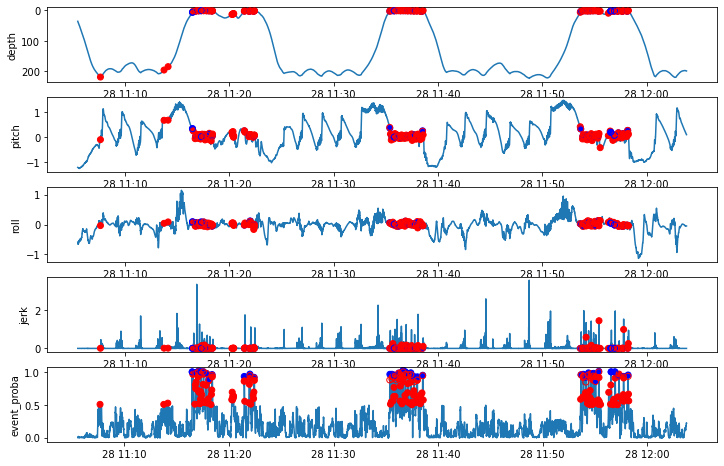

In [5]:
breath_sb.fit()
breath_sb.predict_self(nth=5)
breath_sb.assess(tol=40)
tp, fp, fn = (np.sum(breath_sb.outcomes == o) for o in ["TP", "FP", "FN"])
print("TP: {}, FP: {}, FN: {}".format(tp, fp, fn))
first_predictions = breath_sb.plot_predictions(interactive=False)

The randomly sampled non-events are unlikely to contain much useful information for differentiating windows with events from windows that *almost* look like events. That's why the first round of predictions resulted in many true positives and few false negatives, but many false positives as well. The false positives are *almost* events that we use to refine the model.

TP: 31, FP: 1, FN: 6


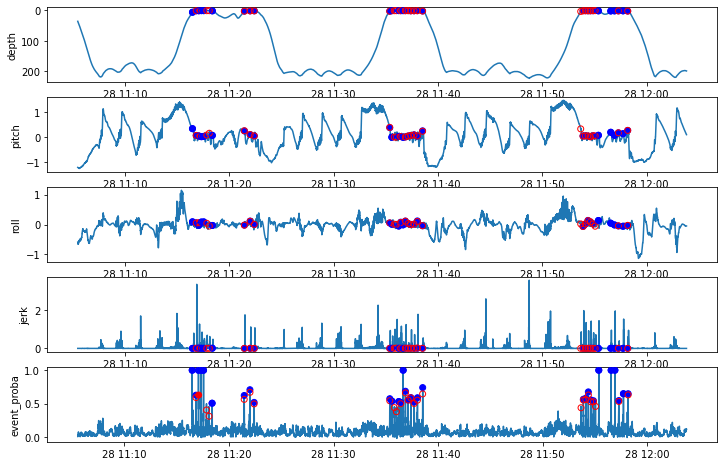

In [6]:
breath_sb.refit()
breath_sb.predict_self(nth=5)
breath_sb.assess(tol=40)
tp, fp, fn = (np.sum(breath_sb.outcomes == o) for o in ["TP", "FP", "FN"])
print("TP: {}, FP: {}, FN: {}".format(tp, fp, fn))
second_predictions = breath_sb.plot_predictions(interactive=False)